## INFERENTIAL STATISTICS PROJECT : STROOP EFFECT
### SOHAN SAMANTA

### INTRODUCTION:
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('../inferential statistics/stroopdata.csv')
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


QUESTION 1.
What is our independent variable? What is our dependent variable?

Ans. The independent variable is the condtion of the variables i.e., whether the variables are congruent or incongruent.
The dependent variable is the response time of the participant for the test.

QUESTION 2. 
What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Ans. An appropriate set of hypothesis can be the following:

$H_o : \bar{x}_i - \bar{x}_c = 0$

$H_a : \bar{x}_i - \bar{x}_c > 0$

where, 
        $\bar{x}_i$ represents the sample mean for incongruent condition, and 
        $\bar{x}_c$ represents the sample mean for congruent condition.

It is to be noted that the population dat is not available to us, and we are only working with a sample data of length 24, and it is for this reason that Bessel's correction has been applied while calculating the standard deviation. Essentially we are trying to make inferences about the population from the sample data available. For the alternative hypothesis, we could have also hypothsised that the two means will simply not be equal. But the fact that the incongruent variables are meant to be harder to discern, it leads to the valid assumption that the incongruent variables will also take more time.

For this statistical problem, we will use the dependent samples t-test. 
Firstly, we are going for a samples t-test because because we have no knowledge of the population data, specifically population standard deviation. t-test are also suitable for cases where the sample size is less than 30(24 in our case).
Secondly, the reason for choosing dependent samples t-test, rests on the fact that both the tests will be taken by the same participant / group of participants and their different times for the different variables are to be compared. Since one contestant takes both the tests, it is very well possible that the practice from the first test may affect the results of the second test, hence the dependent samples test.
Lastly, as we will see in the normal probability plots, the sample datas fall roughly on a normal curve, and hence is suitable for a t-test.

QUESTION 3. 
Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [4]:
print("Congruent tests:")
print("Mean = {}".format(round(data['Congruent'].mean(),2)))
print("Standard deviation = {}".format(round(data['Congruent'].std(),2)))

Congruent tests:
Mean = 14.05
Standard deviation = 3.56


In [5]:
print("Incongruent tests:")
print("Mean = {}".format(round(data['Incongruent'].mean(),2)))
print("Standard deviation = {}".format(round(data['Incongruent'].std(),2)))

Incongruent tests:
Mean = 22.02
Standard deviation = 4.8


QUESTION 4. 
Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

#### Scatter Plot

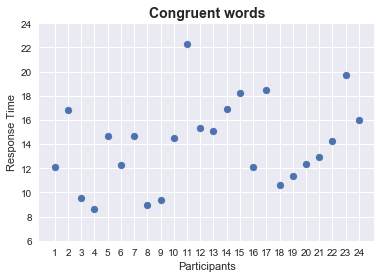

In [6]:
plt.scatter(np.arange(1,25), data['Congruent'])
plt.xticks(np.arange(1, 25, 1))
plt.yticks(np.arange(math.floor(min(data['Congruent']-2)), math.ceil(max(data['Congruent']+2)), 2))
plt.title('Congruent words',fontsize=14, fontweight='bold')
plt.ylabel('Response Time')
plt.xlabel('Participants')
plt.show()

#### Normal probability Plot

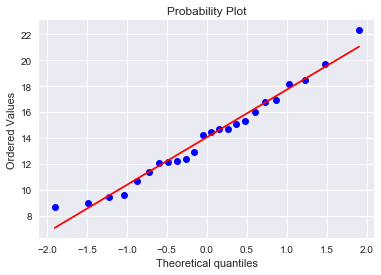

In [7]:
stats.probplot(data['Congruent'], plot=plt)
plt.show()

#### Scatter Plot

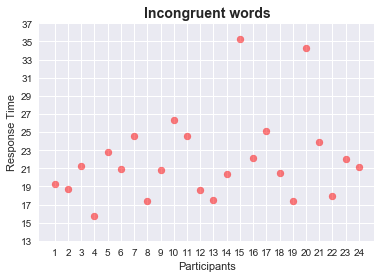

In [8]:
plt.scatter(np.arange(1,25), data['Incongruent'], c='red', alpha=0.5)
plt.xticks(np.arange(1, 25, 1))
plt.yticks(np.arange(math.floor(min(data['Incongruent']-2)), math.ceil(max(data['Incongruent']+2)), 2))
plt.title('Incongruent words',fontsize=14, fontweight='bold')
plt.ylabel('Response Time')
plt.xlabel('Participants')
plt.show()

#### Normal probability Plot

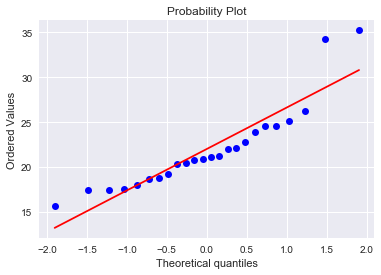

In [9]:
stats.probplot(data['Incongruent'], plot=plt)
plt.show()

Looking at the response time for the participants for the two tests, it is clearly visible that the range for the incongruent variables is larger than that for the congruent variables. 
While the congruent variables test has a response time range from 8 to 22, the incongruent test has a range from 17 to 35. 
The normal probability plots shows that for both the tests the data lies closely to a normal curve.

QUESTION 5. 
Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

For our dependent t-test, we will consider an alpha value of 0.05.

Since our degrees of freedom is 23(total no of observations-1) and $\alpha$ = 0.05, the t-critical value we get from the t table is 1.714

In [31]:
data['Diff'] = data['Congruent'] - data['Incongruent']
data['Diff_minus_mean_square'] = (data['Diff'] - data['Diff'].mean())**2
df = len(data)-1
S = math.sqrt(data['Diff_minus_mean_square'].sum() / df)
t = (data['Incongruent'].mean() - data['Congruent'].mean())/(S/math.sqrt(len(data)))
print('The value of t-statistics is',t)

The value of t-statistics is 8.020706944109955


The t-statistics value is thus greater than the t-critical value:

$t-statistics = 8.02 > t-critical = 1.714$

Hence, we reject the null as the t-statistics is significantly higher than the t-critical.

This result does align with our expectations. The way the test is designed, instinctively we understood that naming the color of the incongruent words would be a more difficult task than naming the color of congruent words. This test only confirms our assumption.

QUESTION 6. 
Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I read in an article that stated, once the human brain gets attuned to reading a language, it essentially just looks at the first and last letters to assume the best possible match for that word. That is what lets us read sentences so quickly.; we are not reading all the letters, just a bare minimum of them so that our brain can deduce the rest. 
Thus, the human brain is so familiar with reading, that when words are held infront of the eye, the brain automatically discerns it. But identifying the color,  which maybe different from the word, and stating it aloud requires extra work and thus extra time. This time difference is what appears in these stroop tests.

A similar task that might reveal a similar result may be obtained from trying to name different shapes with the names of the shapes spelled inside the shapes. For congruent examples, the correct names will be placed inside each shape, for incongruent ones, wrong names will be placed inside the shapes. The task will be to name the correct shape. The point would be to see how much difficulty is faced or more time is required to name the shapes. My expectation is that the incongruent examples will take more time to be named, although the difference in times may not be as pronounced as this experiment.